In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import shock_tube
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
from sedov import sedovana

In [2]:
def get_analytical_solution(dim: int, gamma: float, E0: float, rho0: float, t: float):
    r, d, u, p = sedovana(gamma=gamma, dim=dim)

    r *= (E0 / rho0) ** (1 / (dim + 2)) * t ** (2 / (dim + 2))
    d *= rho0
    u *= (E0 / rho0) ** (1 / (dim + 2)) * t ** (-dim / (dim + 2))
    p *= (E0 / rho0) ** (2 / (dim + 2)) * t ** (-2 * dim / (dim + 2)) * rho0

    return r, d, u, p

In [3]:
gamma = 1.4
E0 = 1
rho0 = 1
t = 0.5

1D

chi0=0.9730605156477095


Text(0.5, 0, '$x$')

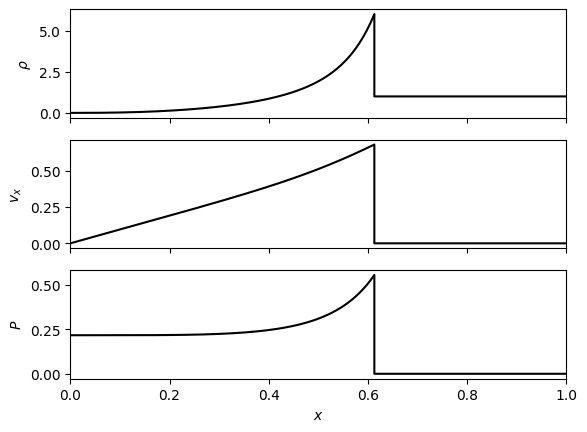

In [4]:
fig, ax = plt.subplots(3, sharex=True)

r, d, u, p = get_analytical_solution(1, gamma, E0, rho0, t)
ax[0].plot(r, d, label="Analytical", color="k")
ax[0].set_ylabel(r"$\rho$")
ax[1].plot(r, u, label="Analytical", color="k")
ax[1].set_ylabel(r"$v_x$")
ax[2].plot(r, p, label="Analytical", color="k")
ax[2].set_ylabel(r"$P$")
ax[2].set_xlim(0, 1)
ax[2].set_xlabel(r"$x$")

In [5]:
N = 128

for p in [0, 1]:
    solver = EulerSolver(
        w0=partial(
            shock_tube,
            mode="cube",
            x_cube=(0, 1 / N),
            rho_in_out=(rho0, rho0),
            P_in_out=(0.5 * N * E0 * (gamma - 1), 1e-5),
        ),
        gamma=gamma,
        bc=BoundaryCondition(x=("reflective", "free")),
        CFL=0.8,
        nx=N,
        px=p,
        riemann_solver="hllc",
        a_posteriori_slope_limiting=True,
        slope_limiter="minmod",
        NAD=1e-2,
        all_floors=True,
        cupy=False,
    )
    solver.rkorder(t)

    solver.plot_1d_slice(ax[0], param="rho", label=f"{p=}", y=0.5, z=0.5, verbose=False)
    solver.plot_1d_slice(ax[1], param="vx", label=f"{p=}", y=0.5, z=0.5, verbose=False)
    solver.plot_1d_slice(ax[2], param="P", label=f"{p=}", y=0.5, z=0.5, verbose=False)

100%|██████████| 0.5/0.5 [00:02]                  
100%|██████████| 0.5/0.5 [00:06]                  


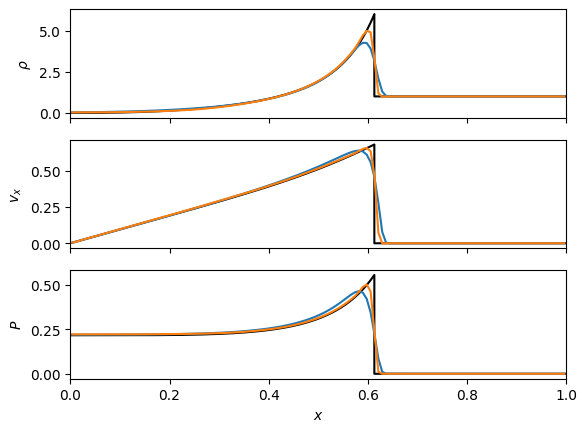

In [6]:
ax[2].set_xlim(0, 1)
fig

2D

chi0=1.0018778777166573


Text(0.5, 0, '$x$')

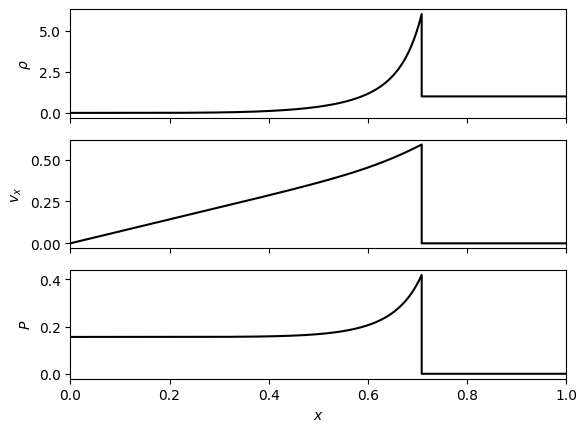

In [7]:
fig, ax = plt.subplots(3, sharex=True)

r, d, u, p = get_analytical_solution(2, gamma, E0, rho0, t)
ax[0].plot(r, d, label="Analytical", color="k")
ax[0].set_ylabel(r"$\rho$")
ax[1].plot(r, u, label="Analytical", color="k")
ax[1].set_ylabel(r"$v_x$")
ax[2].plot(r, p, label="Analytical", color="k")
ax[2].set_ylabel(r"$P$")
ax[2].set_xlim(0, 1)
ax[2].set_xlabel(r"$x$")

In [8]:
N = 32

for p in [0, 1, 3]:
    solver = EulerSolver(
        w0=partial(
            shock_tube,
            mode="cube",
            x_cube=(0, 1 / N),
            y_cube=(0, 1 / N),
            rho_in_out=(rho0, rho0),
            P_in_out=(0.25 * (N**2) * E0 * (gamma - 1), 1e-5),
        ),
        gamma=gamma,
        bc=BoundaryCondition(x=("reflective", "free"), y=("reflective", "free")),
        CFL=0.8,
        nx=N,
        ny=N,
        px=p,
        py=p,
        riemann_solver="hllc",
        a_posteriori_slope_limiting=True,
        slope_limiter="minmod",
        NAD=1e-2,
        all_floors=True,
        cupy=False,
    )
    solver.rkorder(t)

    solver.plot_1d_slice(ax[0], param="rho", label=f"{p=}", y=0, z=0.5, verbose=True)
    solver.plot_1d_slice(ax[1], param="vx", label=f"{p=}", y=0, z=0.5, verbose=True)
    solver.plot_1d_slice(ax[2], param="P", label=f"{p=}", y=0, z=0.5, verbose=True)

100%|██████████| 0.5/0.5 [00:04]                  


t=0.50, x=[0.02, 0.98], y=0.02, z=0.50
t=0.50, x=[0.02, 0.98], y=0.02, z=0.50
t=0.50, x=[0.02, 0.98], y=0.02, z=0.50


100%|██████████| 0.5/0.5 [00:10]                 


t=0.50, x=[0.02, 0.98], y=0.02, z=0.50
t=0.50, x=[0.02, 0.98], y=0.02, z=0.50
t=0.50, x=[0.02, 0.98], y=0.02, z=0.50


100%|██████████| 0.5/0.5 [00:22]                  

t=0.50, x=[0.02, 0.98], y=0.02, z=0.50
t=0.50, x=[0.02, 0.98], y=0.02, z=0.50
t=0.50, x=[0.02, 0.98], y=0.02, z=0.50


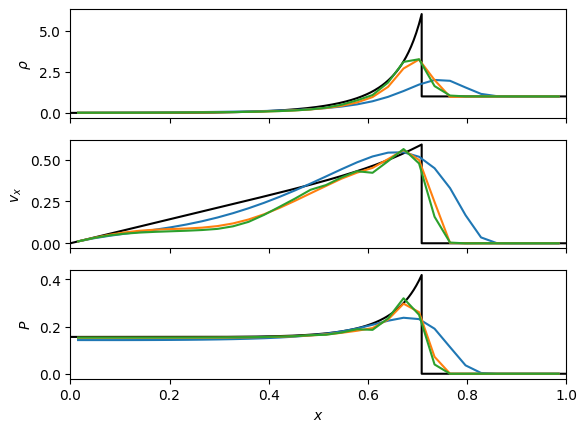

In [9]:
ax[2].set_xlim(0, 1)
fig